In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
# import KMeans
from sklearn.cluster import KMeans

In [25]:
df = pd.read_csv("./data/realKnownCause/ambient_temperature_system_failure.csv")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7267 non-null   object 
 1   value      7267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.7+ KB


In [27]:
df.describe(include="all")

,timestamp,value
count,7267,7267.000000
unique,7267,NaN
top,2013-07-04 00:00:00,NaN
freq,1,NaN
mean,NaN,71.242433
std,NaN,4.247509
min,NaN,57.458406
25%,NaN,68.369411
50%,NaN,71.858493
75%,NaN,74.430958


In [28]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [29]:
df['value'] = (df['value'] - 32) * 5/9

In [30]:
df

,timestamp,value
0,2013-07-04 00:00:00,21.044908
1,2013-07-04 01:00:00,21.789015
2,2013-07-04 02:00:00,21.598781
3,2013-07-04 03:00:00,20.533000
4,2013-07-04 04:00:00,20.713084
...,...,...
7262,2014-05-28 11:00:00,22.427892
7263,2014-05-28 12:00:00,22.318309
7264,2014-05-28 13:00:00,22.248092
7265,2014-05-28 14:00:00,22.125126


In [31]:
df['value'].mean()

21.801351504604533

In [33]:
df.describe(include="all")

/var/folders/84/6vx8lc2j0qx9grccw3440b6r0000gq/T/ipykernel_2312/1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,timestamp,value
count,7267,7267.000000
unique,7267,NaN
top,2013-07-04 00:00:00,NaN
freq,1,NaN
first,2013-07-04 00:00:00,NaN
last,2014-05-28 15:00:00,NaN
mean,NaN,21.801352
std,NaN,2.359727
min,NaN,14.143559
25%,NaN,20.205228


<AxesSubplot:xlabel='timestamp'>

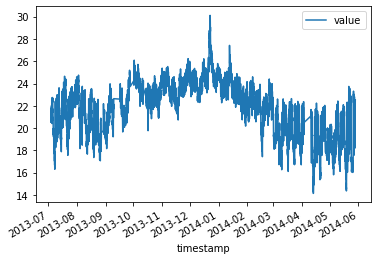

In [32]:
df.plot(x='timestamp', y='value')

In [35]:
df['hours'] = df['timestamp'].dt.hour

In [36]:
df

,timestamp,value,hours
0,2013-07-04 00:00:00,21.044908,0
1,2013-07-04 01:00:00,21.789015,1
2,2013-07-04 02:00:00,21.598781,2
3,2013-07-04 03:00:00,20.533000,3
4,2013-07-04 04:00:00,20.713084,4
...,...,...,...
7262,2014-05-28 11:00:00,22.427892,11
7263,2014-05-28 12:00:00,22.318309,12
7264,2014-05-28 13:00:00,22.248092,13
7265,2014-05-28 14:00:00,22.125126,14


In [37]:
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)

In [40]:
df.head(30)

,timestamp,value,hours,daylight
0,2013-07-04 00:00:00,21.044908,0,0
1,2013-07-04 01:00:00,21.789015,1,0
2,2013-07-04 02:00:00,21.598781,2,0
3,2013-07-04 03:00:00,20.533000,3,0
4,2013-07-04 04:00:00,20.713084,4,0
5,2013-07-04 05:00:00,21.144981,5,0
6,2013-07-04 06:00:00,20.710980,6,0
7,2013-07-04 07:00:00,20.760894,7,1
8,2013-07-04 08:00:00,20.648174,8,1
9,2013-07-04 09:00:00,20.547824,9,1


In [43]:
df['DayOfTheWeek'] = df['timestamp'].dt.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)

In [45]:
df.head(30)

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay
0,2013-07-04 00:00:00,21.044908,0,0,3,1
1,2013-07-04 01:00:00,21.789015,1,0,3,1
2,2013-07-04 02:00:00,21.598781,2,0,3,1
3,2013-07-04 03:00:00,20.533000,3,0,3,1
4,2013-07-04 04:00:00,20.713084,4,0,3,1
5,2013-07-04 05:00:00,21.144981,5,0,3,1
6,2013-07-04 06:00:00,20.710980,6,0,3,1
7,2013-07-04 07:00:00,20.760894,7,1,3,1
8,2013-07-04 08:00:00,20.648174,8,1,3,1
9,2013-07-04 09:00:00,20.547824,9,1,3,1


In [46]:
outliers_fraction = 0.01

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     7267 non-null   datetime64[ns]
 1   value         7267 non-null   float64       
 2   hours         7267 non-null   int64         
 3   daylight      7267 non-null   int64         
 4   DayOfTheWeek  7267 non-null   int64         
 5   WeekDay       7267 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 340.8 KB


In [51]:



df['time_epoch'] = (df['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

/var/folders/84/6vx8lc2j0qx9grccw3440b6r0000gq/T/ipykernel_2312/757740686.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['time_epoch'] = (df['timestamp'].astype(np.int64)/100000000000).astype(np.int64)


In [52]:
df

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,time_epoch
0,2013-07-04 00:00:00,21.044908,0,0,3,1,13728960
1,2013-07-04 01:00:00,21.789015,1,0,3,1,13728996
2,2013-07-04 02:00:00,21.598781,2,0,3,1,13729032
3,2013-07-04 03:00:00,20.533000,3,0,3,1,13729068
4,2013-07-04 04:00:00,20.713084,4,0,3,1,13729104
...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,22.427892,11,1,2,1,14012748
7263,2014-05-28 12:00:00,22.318309,12,1,2,1,14012784
7264,2014-05-28 13:00:00,22.248092,13,1,2,1,14012820
7265,2014-05-28 14:00:00,22.125126,14,1,2,1,14012856


In [55]:
df['WeekDay']

0       1
1       1
2       1
3       1
4       1
       ..
7262    1
7263    1
7264    1
7265    1
7266    1
Name: WeekDay, Length: 7267, dtype: int64

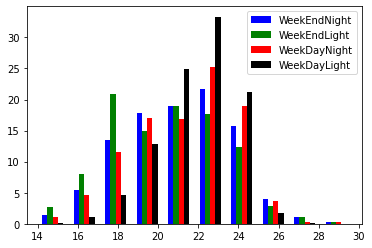

In [57]:
df['categories'] = df['WeekDay']*2 + df['daylight']

a = df.loc[df['categories'] == 0, 'value']
b = df.loc[df['categories'] == 1, 'value']
c = df.loc[df['categories'] == 2, 'value']
d = df.loc[df['categories'] == 3, 'value']

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)

width = (a_bins[1] - a_bins[0])/6

ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='blue', label='WeekEndNight')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='WeekEndLight')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='red', label ='WeekDayNight')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='black', label ='WeekDayLight')

plt.legend()
plt.show()

In [59]:
df

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,time_epoch,categories
0,2013-07-04 00:00:00,21.044908,0,0,3,1,13728960,2
1,2013-07-04 01:00:00,21.789015,1,0,3,1,13728996,2
2,2013-07-04 02:00:00,21.598781,2,0,3,1,13729032,2
3,2013-07-04 03:00:00,20.533000,3,0,3,1,13729068,2
4,2013-07-04 04:00:00,20.713084,4,0,3,1,13729104,2
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,22.427892,11,1,2,1,14012748,3
7263,2014-05-28 12:00:00,22.318309,12,1,2,1,14012784,3
7264,2014-05-28 13:00:00,22.248092,13,1,2,1,14012820,3
7265,2014-05-28 14:00:00,22.125126,14,1,2,1,14012856,3


In [60]:
df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]

,value,hours,daylight,DayOfTheWeek,WeekDay
0,21.044908,0,0,3,1
1,21.789015,1,0,3,1
2,21.598781,2,0,3,1
3,20.533000,3,0,3,1
4,20.713084,4,0,3,1
...,...,...,...,...,...
7262,22.427892,11,1,2,1
7263,22.318309,12,1,2,1
7264,22.248092,13,1,2,1
7265,22.125126,14,1,2,1


In [61]:
# Take useful feature and standardize them
data = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
np_scaled

array([[-0.32058581, -1.66153683, -1.41479759,  0.00576899,  0.62131999],
       [-0.00522828, -1.51717197, -1.41479759,  0.00576899,  0.62131999],
       [-0.08585098, -1.37280711, -1.41479759,  0.00576899,  0.62131999],
       ...,
       [ 0.18933168,  0.21520635,  0.70681489, -0.49933023,  0.62131999],
       [ 0.13721779,  0.35957121,  0.70681489, -0.49933023,  0.62131999],
       [ 0.31589058,  0.50393607,  0.70681489, -0.49933023,  0.62131999]])

In [65]:
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
data

array([[11.55006212, -0.15749257],
       [10.51596241,  0.50693119],
       [ 9.52726831,  0.27763327],
       ...,
       [-1.52693536,  0.64993876],
       [-2.51889846,  0.48498482],
       [-3.53732503,  0.84091306]])

In [67]:
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
data

,0,1
0,1.664216,-0.066493
1,1.515215,0.214024
2,1.372757,0.117216
3,1.236430,-0.333175
4,1.091379,-0.280433
...,...,...
7262,0.066310,0.386980
7263,-0.076713,0.322742
7264,-0.220012,0.274401
7265,-0.362941,0.204758


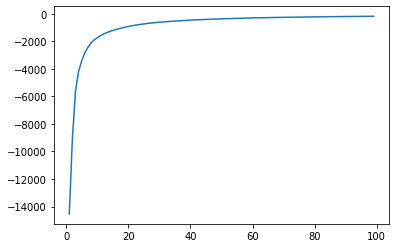

In [78]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 100)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [80]:
kmeans[14].predict(data)

array([11, 11, 11, ..., 12, 12,  6], dtype=int32)

In [82]:
df['cluster'] = kmeans[14].predict(data)
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

12    675
6     657
4     640
9     622
2     587
0     586
8     572
11    514
7     488
1     444
3     354
10    315
13    298
5     294
14    221
Name: cluster, dtype: int64

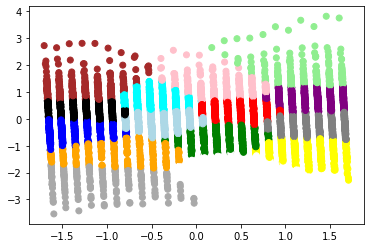

In [83]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()

In [84]:
%pip install pyEMMA

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00:00:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... |

In [ ]:
from pyemma import msm

def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
        #distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

# train markov model to get transition matrix
def getTransitionMatrix (df):
	df = np.array(df)
	model = msm.estimate_markov_model(df, 1)
	return model.transition_matrix

def markovAnomaly(df, windows_size, threshold):
    transition_matrix = getTransitionMatrix(df)
    real_threshold = threshold**windows_size
    df_anomaly = []
    for j in range(0, len(df)):
        if (j < windows_size):
            df_anomaly.append(0)
        else:
            sequence = df[j-windows_size:j]
            sequence = sequence.reset_index(drop=True)
            df_anomaly.append(anomalyElement(sequence, real_threshold, transition_matrix))
    return df_anomaly

In [ ]:
distance = getDistanceByPoint(data, kmeans[14])

In [ ]:
number_of_outliers = int(outliers_fraction*len(distance))

In [ ]:
threshold = distance.nlargest(number_of_outliers).min()

In [ ]:
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomaly21'] = (distance >= threshold).astype(int)